<a href="https://colab.research.google.com/github/ErikaRochadeAraujo/RegressaoImoveis/blob/main/regressaoImoveis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão de um case de dados de Imóveis

Importando as bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import pickle

Temos arquivos já separados do que dever ser treino e do que deve ser teste.

Lendo os dados para poder trabalhar com  eles.

In [3]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

Analisando o arquivo train.

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Analisando o arquivo test.

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

Criando um coluna onde marcamos quem é test com 0 e quem é train com 1.

In [6]:
train["IsTrain"] = 1
test["IsTrain"] = 0

In [7]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,IsTrain
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,1


In [8]:
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,IsTrain
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,0
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,0
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,0
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,0
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,0


Juntando as duas fontes de dados para poder trabalhar melhor na analise já que elas estão marcadas para depois separar.

In [9]:
df = pd.concat([train, test])

Como ficou tudo junto.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [11]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,IsTrain
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,1


In [12]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,IsTrain
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN,0
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN,0
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN,0
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN,0


In [13]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Análise da correlação 

Aqui vamos analisar as colunas que apresentam maiores correlações com SalePrice. 

Pegaremos essas colunas para trabalhar na regressão.

Correlação deve ser alta tanto positiva quanto negativa.

In [14]:
df2=df[[ 'SalePrice','MasVnrArea', 'LotFrontage', 'GarageYrBlt','OverallQual', 'YearBuilt', 'YearRemodAdd', 'Fireplaces', 
              'GarageCars', 'GarageArea', 'BsmtFinSF1', 'TotalBsmtSF',
              '1stFlrSF','GrLivArea', 'FullBath']].corr().round(2)

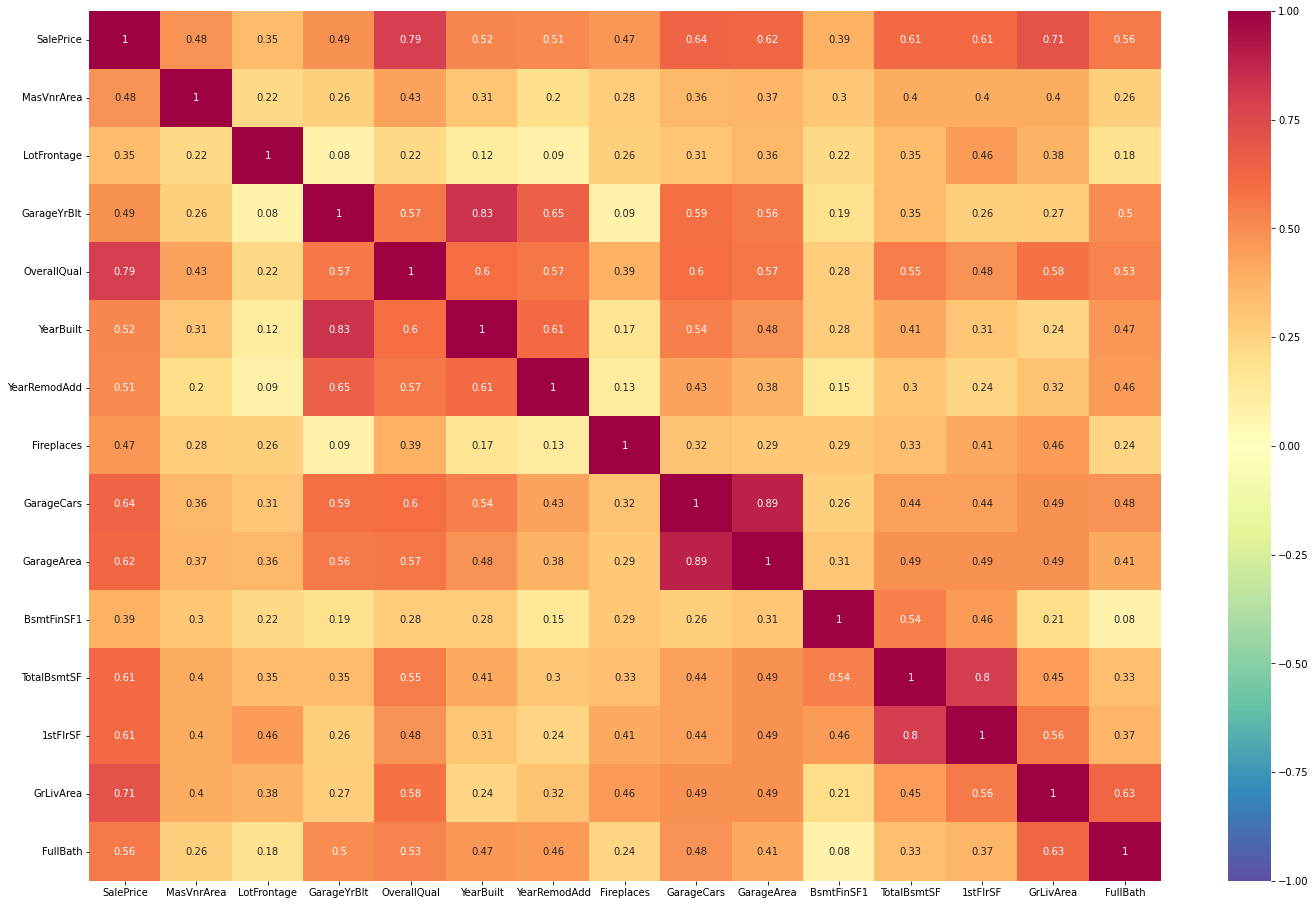

In [15]:
fig, ax = plt.subplots(figsize=(24,16))
sns.heatmap(df2, ax=ax, vmin=-1.0,vmax=1.0, annot=True,cmap='Spectral_r') 
plt.show()

Estimando o 'SalePrice' com base nas variáveis definidas pela análise de correlação

Primeiro, vamos separar os dados de novo

In [16]:
df_test_2=df[df['IsTrain']==0]

In [17]:

df_train_2=df[df['IsTrain']==1]

In [18]:
df_train_2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,IsTrain
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,1


In [19]:
lr=LinearRegression()
X=df_train_2[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'Fireplaces', 
              'GarageCars', 'GarageArea', 'BsmtFinSF1', 'TotalBsmtSF',
              '1stFlrSF','GrLivArea', 'FullBath']]
Y=df_train_2[['SalePrice']]

In [20]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, random_state=42, test_size=0.3)

In [21]:
lr.fit(X_train,Y_train)

LinearRegression()

In [22]:
Yhat=lr.predict(X_valid)

In [23]:
Yhat

array([[149329.20817408],
       [304507.82109333],
       [113937.26869998],
       [179644.60841616],
       [297971.06848695],
       [ 51654.09390535],
       [229800.17596515],
       [174576.18538435],
       [ 50145.72204022],
       [109802.73504659],
       [151691.88822251],
       [105512.70899166],
       [ 80119.50197208],
       [206704.95937333],
       [192443.30685741],
       [125033.88664334],
       [213679.30383118],
       [130834.89855487],
       [115416.396381  ],
       [222110.80372983],
       [181131.40758577],
       [220684.48595727],
       [178003.00780455],
       [112581.56053541],
       [209310.76234346],
       [168104.85050554],
       [197351.0227016 ],
       [ 84313.27426671],
       [187316.66673939],
       [207331.08794796],
       [121924.91084764],
       [262921.73502682],
       [194852.520505  ],
       [ 78391.36472204],
       [260376.31278255],
       [154928.71179429],
       [146451.64655545],
       [222125.8388882 ],
       [3028

In [24]:
Y_valid

,SalePrice
892,154500.0
1105,325000.0
413,115000.0
522,159000.0
1036,315500.0
...,...
331,139000.0
323,126175.0
650,205950.0
439,110000.0


In [25]:
r2= r2_score(Y_valid,Yhat)
print('As variáveis explicativas do modelo explicam as variações no preço de venda dos imóveis em:',(r2*100).round(2),'%')

As variáveis explicativas do modelo explicam as variações no preço de venda dos imóveis em: 80.83 %


In [26]:
m_abe=mean_absolute_error(Y_valid,Yhat)
print('O erro médio absoluto do modelo é:', (m_abe).round(2))

O erro médio absoluto do modelo é: 24232.33


In [27]:
m_sqe=mean_squared_error(Y_valid,Yhat)
print('O erro médio quadrático do modelo é:', (m_sqe).round(2))

O erro médio quadrático do modelo é: 1337499031.46


In [28]:
m_sqe_sqrt=math.sqrt(m_sqe)
print('A raiz quadrada do erro médio quadrático é:', (m_sqe_sqrt))

A raiz quadrada do erro médio quadrático é: 36571.833854163844


In [29]:
lr.coef_

array([[ 1.92568904e+04,  2.27841743e+02,  3.47997538e+02,
         9.61594675e+03,  1.50860924e+04,  5.37442854e+00,
         1.87733318e+01,  3.55529028e+00,  1.05877616e+01,
         4.13827981e+01, -1.58648955e+03]])

In [30]:
lr.intercept_

array([-1197139.32509137])

In [31]:
with open('LinearRegression.pkl', 'wb') as modelo:
  pickle.dump(lr,modelo)

In [32]:
with open('LinearRegression.pkl', 'rb') as modelo:
  regressao=pickle.load(modelo)

In [33]:
regressao

LinearRegression()

In [ ]:
#Aplicando a regressão na tabela de teste

In [34]:
df_test_2[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'Fireplaces', 
              'GarageCars', 'GarageArea', 'BsmtFinSF1', 'TotalBsmtSF',
              '1stFlrSF','GrLivArea', 'FullBath']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1459 non-null   int64  
 1   YearBuilt     1459 non-null   int64  
 2   YearRemodAdd  1459 non-null   int64  
 3   Fireplaces    1459 non-null   int64  
 4   GarageCars    1458 non-null   float64
 5   GarageArea    1458 non-null   float64
 6   BsmtFinSF1    1458 non-null   float64
 7   TotalBsmtSF   1458 non-null   float64
 8   1stFlrSF      1459 non-null   int64  
 9   GrLivArea     1459 non-null   int64  
 10  FullBath      1459 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 136.8 KB


In [ ]:
# As variáveis: 'GarageCars', 'GarageArea', 'BsmtFinSF1', 'TotalBsmtSF'

# Apresentam 1 observação com dados nulos.

# Vamos substituir esses nulos por

In [35]:
df_test_2[['GarageCars','GarageArea', 'BsmtFinSF1','TotalBsmtSF']].mean().round(2)

GarageCars        1.77
GarageArea      472.77
BsmtFinSF1      439.20
TotalBsmtSF    1046.12
dtype: float64

In [36]:
df_test_2[['GarageCars','GarageArea', 'BsmtFinSF1','TotalBsmtSF']].median().round(2)

GarageCars       2.0
GarageArea     480.0
BsmtFinSF1     350.5
TotalBsmtSF    988.0
dtype: float64

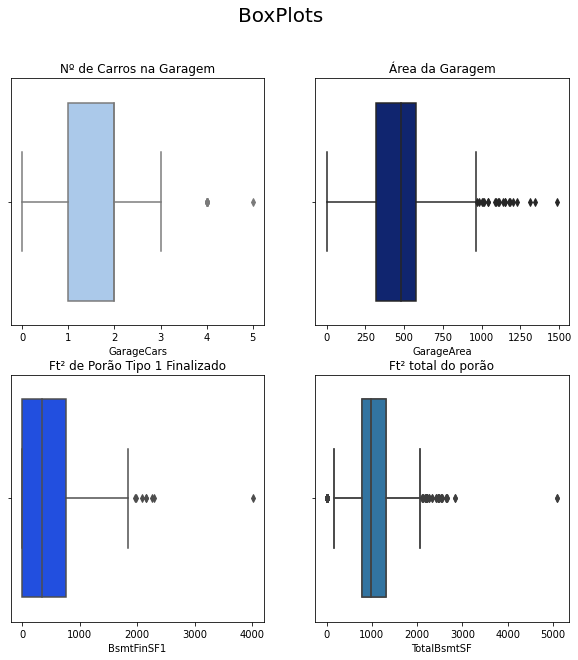

In [37]:
fig, axes =plt.subplots(2,2,figsize=[10,10])

sns.boxplot(data=df_test_2,x='GarageCars',ax=axes[0,0],palette='pastel').set_title('Nº de Carros na Garagem')
sns.boxplot(data=df_test_2, x='GarageArea',ax=axes[0,1],palette='dark').set_title('Área da Garagem')
sns.boxplot(data=df_test_2,x='BsmtFinSF1',ax=axes[1,0],palette='bright').set_title('Ft² de Porão Tipo 1 Finalizado')
sns.boxplot(data=df_test_2,x='TotalBsmtSF',ax=axes[1,1],palette='deep').set_title('Ft² total do porão')

fig.suptitle('BoxPlots',fontsize=20)

sns.boxplot(data=df_test_2,x=df_test_2['TotalBsmtSF'])
plt.show()

In [ ]:
#  vamos fazer a substituição utilizando a mediana para diminuir o impacto de outliers nos nossos resultados

In [38]:
df_test_2['GarageCars'].fillna(df_test_2['GarageCars'].median(),inplace=True)
df_test_2['GarageArea'].fillna(df_test_2['GarageArea'].median(),inplace=True)
df_test_2['BsmtFinSF1'].fillna(df_test_2['BsmtFinSF1'].median(),inplace=True)
df_test_2['TotalBsmtSF'].fillna(df_test_2['TotalBsmtSF'].median(),inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inpla

In [39]:
df_test_2[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'Fireplaces', 
              'GarageCars', 'GarageArea', 'BsmtFinSF1', 'TotalBsmtSF',
              '1stFlrSF','GrLivArea', 'FullBath']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1459 non-null   int64  
 1   YearBuilt     1459 non-null   int64  
 2   YearRemodAdd  1459 non-null   int64  
 3   Fireplaces    1459 non-null   int64  
 4   GarageCars    1459 non-null   float64
 5   GarageArea    1459 non-null   float64
 6   BsmtFinSF1    1459 non-null   float64
 7   TotalBsmtSF   1459 non-null   float64
 8   1stFlrSF      1459 non-null   int64  
 9   GrLivArea     1459 non-null   int64  
 10  FullBath      1459 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 136.8 KB


In [40]:
X_2=df_test_2[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'Fireplaces', 
              'GarageCars', 'GarageArea', 'BsmtFinSF1', 'TotalBsmtSF',
              '1stFlrSF','GrLivArea', 'FullBath']]

In [42]:
Yhat_2=regressao.predict(X_2).round(2)


In [51]:
df_test_2[['prevendo']]=Yhat_2
df_test_2.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,IsTrain,prevendo
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,MnPrv,NaN,0,6,2010,WD,Normal,104276.20,0,104276.20
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,NaN,Gar2,12500,6,2010,WD,Normal,152193.39,0,152193.39
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,MnPrv,NaN,0,3,2010,WD,Normal,184036.83,0,184036.83
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,6,2010,WD,Normal,198846.05,0,198846.05
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,NaN,NaN,0,1,2010,WD,Normal,209716.79,0,209716.79


In [52]:
df_test_2['SalePrice'].fillna(df_test_2['prevendo'],inplace=True)
df_test_2.head()
#df_test_2.drop(columns=['prevendo'],inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,IsTrain,prevendo
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,MnPrv,NaN,0,6,2010,WD,Normal,104276.20,0,104276.20
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,NaN,Gar2,12500,6,2010,WD,Normal,152193.39,0,152193.39
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,MnPrv,NaN,0,3,2010,WD,Normal,184036.83,0,184036.83
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,6,2010,WD,Normal,198846.05,0,198846.05
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,NaN,NaN,0,1,2010,WD,Normal,209716.79,0,209716.79


In [ ]:
# Resultado Final

In [53]:
df_train_2['prevendo']=np.nan
df_train_2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,IsTrain,prevendo
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,2,2008,WD,Normal,208500.0,1,NaN
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,5,2007,WD,Normal,181500.0,1,NaN
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,9,2008,WD,Normal,223500.0,1,NaN
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,1,NaN
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,12,2008,WD,Normal,250000.0,1,NaN


In [54]:
df=pd.concat([df_test_2,df_train_2],axis=0)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,IsTrain,prevendo
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,MnPrv,NaN,0,6,2010,WD,Normal,104276.20,0,104276.20
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,NaN,Gar2,12500,6,2010,WD,Normal,152193.39,0,152193.39
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,MnPrv,NaN,0,3,2010,WD,Normal,184036.83,0,184036.83
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,6,2010,WD,Normal,198846.05,0,198846.05
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,NaN,NaN,0,1,2010,WD,Normal,209716.79,0,209716.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,8,2007,WD,Normal,175000.00,1,NaN
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,MnPrv,NaN,0,2,2010,WD,Normal,210000.00,1,NaN
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,GdPrv,Shed,2500,5,2010,WD,Normal,266500.00,1,NaN
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,4,2010,WD,Normal,142125.00,1,NaN


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


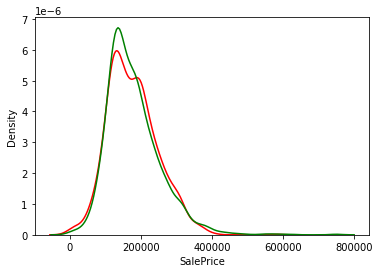

In [58]:
## Vendo se os valores previstos ficaram bem ajustados
sns.distplot(df['prevendo'],hist=False,color='r',label='ValorReal')
sns.distplot(df['SalePrice'],hist=False,color='g',label='ValorReal')
plt.show()